# Sparta Global ETL Project – Visualisations

This notebook contains visualisations using the cleaned Talent and Academy data.
Data is pulled directly from S3 using Boto3 and analysed with Pandas, Matplotlib, and Seaborn.

In [1]:
# Import necessary libraries
import pandas as pd
import boto3
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

## Load data from AWS S3

We use a helper function to pull CSVs directly from the S3 bucket.

In [2]:
def load_csv_from_s3(bucket_name, key):
    s3_client = boto3.client('s3')
    response = s3_client.get_object(Bucket=bucket_name, Key=key)
    content = response['Body'].read().decode('utf-8')
    return pd.read_csv(StringIO(content))

In [3]:
# Define the bucket name
BUCKET = 'data-504-final-project-v2'

# Load Talent datasets
applicants = load_csv_from_s3(BUCKET, 'Cleaned/cleaned_applicants_details.csv')
sparta_day = load_csv_from_s3(BUCKET, 'Cleaned/combined_sparta_day_test_score.csv')
decision_scores = load_csv_from_s3(BUCKET, 'Cleaned/cleaned_talent_decision_scores.csv')

# Load Academy data
business = load_csv_from_s3(BUCKET, 'Academy_Combined/Business_combined.csv')
data = load_csv_from_s3(BUCKET, 'Academy_Combined/Data_combined.csv')
engineering = load_csv_from_s3(BUCKET, 'Academy_Combined/Engineering_combined.csv')

## Preview the Data

Always check that the data loaded correctly before visualising.

In [4]:
# View first few rows of each dataset
applicants.head()

,id,name,gender,dob,email,city,address,postcode,phone_number,uni,degree,invited_date,invited_by
0,1,Esme Trusslove,Female,1994-08-04,etrusslove0@google.es,Swindon,22056 Lerdahl Avenue,SN1,4.429578e+11,"Saint George's Hospital Medical School, Univer...",2:1,2019-04-10,Bruno Bellbrook
1,2,Matthaeus Audas,Male,NaN,maudas1@mapquest.com,Charlton,263 Nelson Trail,OX12,4.495773e+11,Keele University,2:1,2019-04-30,Doris Bellasis
2,3,Cherey Tollfree,Female,1992-12-08,ctollfree2@netvibes.com,Weston,69 Coleman Court,GU32,4.458875e+11,"King's College London, University of London",2:1,2019-04-25,Gismo Tilling
3,4,Eryn Speers,Female,NaN,espeers3@shinystat.com,Sutton,0166 Daystar Drive,CT15,4.414879e+11,University of Edinburgh,2:1,NaN,NaN
4,5,Theadora Berkelay,Female,1995-11-03,tberkelay4@godaddy.com,Upton,6 Mandrake Crossing,WF9,4.484147e+11,University of Leicester,2:1,2019-04-02,Stacey Broad


In [5]:
sparta_day.head()

,date,academy,psychometrics,presentation,candidate_first_name,candidate_last_name
0,2019-08-01,Birmingham Academy,51,19,Hilary,Willmore
1,2019-08-01,Birmingham Academy,51,19,Orly,Lorens
2,2019-08-01,Birmingham Academy,55,16,Alvie,Bleackly
3,2019-08-01,Birmingham Academy,59,21,Deck,Itzchaki
4,2019-08-01,Birmingham Academy,66,25,Wilt,Penritt


In [6]:
decision_scores.head()

,date,strengths,weaknesses,self_development,geo_flex,financial_support_self,result,course_interest,tech_self_score_csharp,tech_self_score_java,tech_self_score_r,tech_self_score_javascript,tech_self_score_python,tech_self_score_c++,tech_self_score_ruby,tech_self_score_spss,tech_self_score_php,candidate_first_name,candidate_last_name
0,2019-08-22,Charisma,"Distracted, Impulsive, Introverted",True,True,True,Pass,Business,6.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,Stillmann,Castano
1,2019-08-01,"Patient, Curious, Problem Solving","Overbearing, Chatty, Indifferent",False,True,True,Fail,Data,4.0,2.0,NaN,NaN,1.0,4.0,NaN,NaN,NaN,Hilary,Willmore
2,2019-08-22,"Courteous, Independent, Patient","Introverted, Impulsive, Anxious",True,True,True,Pass,Business,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,Efrem,Whipple
3,2019-08-28,Passionate,"Perfectionist, Sensitive",True,True,True,Pass,Data,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,Sydel,Fenne
4,2019-08-07,Versatile,"Controlling, Perfectionist, Chatty",True,True,True,Pass,Engineering,NaN,4.0,2.0,NaN,3.0,3.0,1.0,NaN,2.0,Michel,Lebarree


In [7]:
business.head()

,name,trainer,course,cohort_number,start_date,Analytic_W1,Independent_W1,Determined_W1,Professional_W1,Studious_W1,...,Determined_W9,Professional_W9,Studious_W9,Imaginative_W9,Analytic_W10,Independent_W10,Determined_W10,Professional_W10,Studious_W10,Imaginative_W10
0,Quintus Penella,Gregor Gomez,Business,20,2019-02-11,1,2,2,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Simon Murrey,Gregor Gomez,Business,20,2019-02-11,6,1,1,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gustaf Lude,Gregor Gomez,Business,20,2019-02-11,6,4,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Yolanda Fosse,Gregor Gomez,Business,20,2019-02-11,2,1,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lynnett Swin,Gregor Gomez,Business,20,2019-02-11,2,2,4,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.head()

,name,trainer,course,cohort_number,start_date,Analytic_W1,Independent_W1,Determined_W1,Professional_W1,Studious_W1,...,Determined_W9,Professional_W9,Studious_W9,Imaginative_W9,Analytic_W10,Independent_W10,Determined_W10,Professional_W10,Studious_W10,Imaginative_W10
0,Pyotr De Zuani,Trixie Orange,Data,28,2019-02-18,1,3,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vince Scott,Trixie Orange,Data,28,2019-02-18,1,1,4,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kellie Althorp,Trixie Orange,Data,28,2019-02-18,3,4,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aida Bothams,Trixie Orange,Data,28,2019-02-18,4,2,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nettie Civitillo,Trixie Orange,Data,28,2019-02-18,5,4,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
engineering.head()

,name,trainer,course,cohort_number,start_date,Analytic_W1,Independent_W1,Determined_W1,Professional_W1,Studious_W1,...,Determined_W9,Professional_W9,Studious_W9,Imaginative_W9,Analytic_W10,Independent_W10,Determined_W10,Professional_W10,Studious_W10,Imaginative_W10
0,Sigrid Veitch,Eshal Brandt,Engineering,17,2019-02-18,4,4,3,6,2,...,6.0,8.0,7.0,8.0,8.0,8.0,8.0,8.0,7.0,8.0
1,Rodrick Henworth,Eshal Brandt,Engineering,17,2019-02-18,4,4,3,3,1,...,8.0,7.0,8.0,5.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Reggie Lawlor,Eshal Brandt,Engineering,17,2019-02-18,5,2,5,3,3,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
3,Thornton Thuillier,Eshal Brandt,Engineering,17,2019-02-18,3,5,4,5,2,...,7.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,8.0
4,Thomasine Poundford,Eshal Brandt,Engineering,17,2019-02-18,3,2,4,1,2,...,8.0,5.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


## Number of Candidates Invited per Month

The plot below shows how many candidates were invited each month to attend a Sparta Day. This gives a sense of application volume over time.

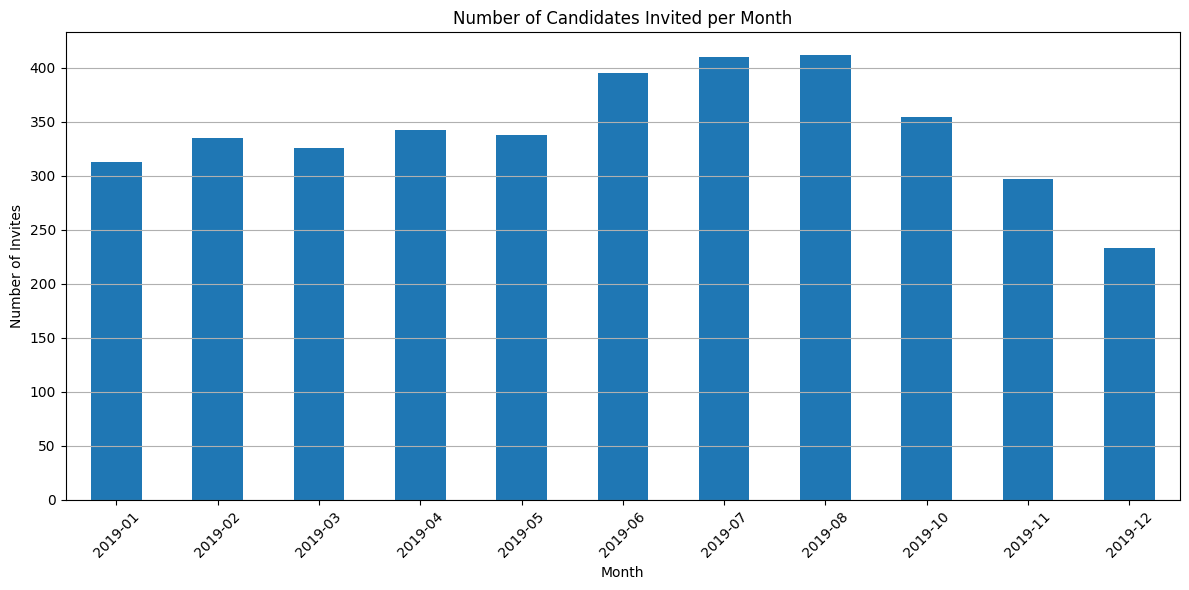

In [20]:
# Convert invited_date to datetime if not already
applicants['invited_date'] = pd.to_datetime(applicants['invited_date'], errors='coerce')

# Extract year and month
applicants['invite_month'] = applicants['invited_date'].dt.to_period('M')

# Group by month and count
invites_per_month = applicants.groupby('invite_month').size()

# Plot
plt.figure(figsize=(12, 6))
invites_per_month.plot(kind='bar')
plt.title('Number of Candidates Invited per Month')
plt.xlabel('Month')
plt.ylabel('Number of Invites')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Interview Outcome Distribution

This chart shows the number of candidates who passed or failed their interviews.


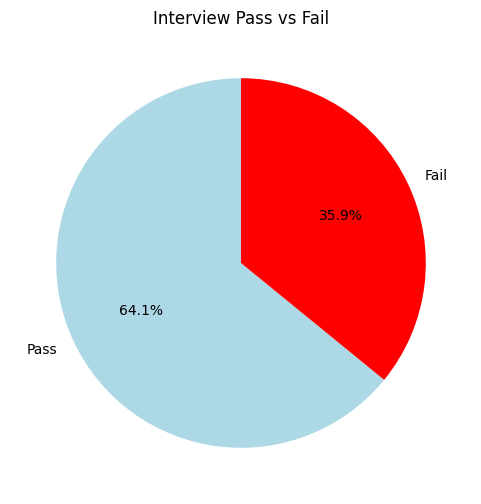

In [11]:
# Clean result column (optional)
decision_scores['result'] = decision_scores['result'].str.strip().str.title()

# Count results
result_counts = decision_scores['result'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
result_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'red'])
plt.title('Interview Pass vs Fail')
plt.ylabel('')
plt.show()

## Course Interest Popularity

This bar chart shows which courses candidates were most interested in after their Sparta Day interview.

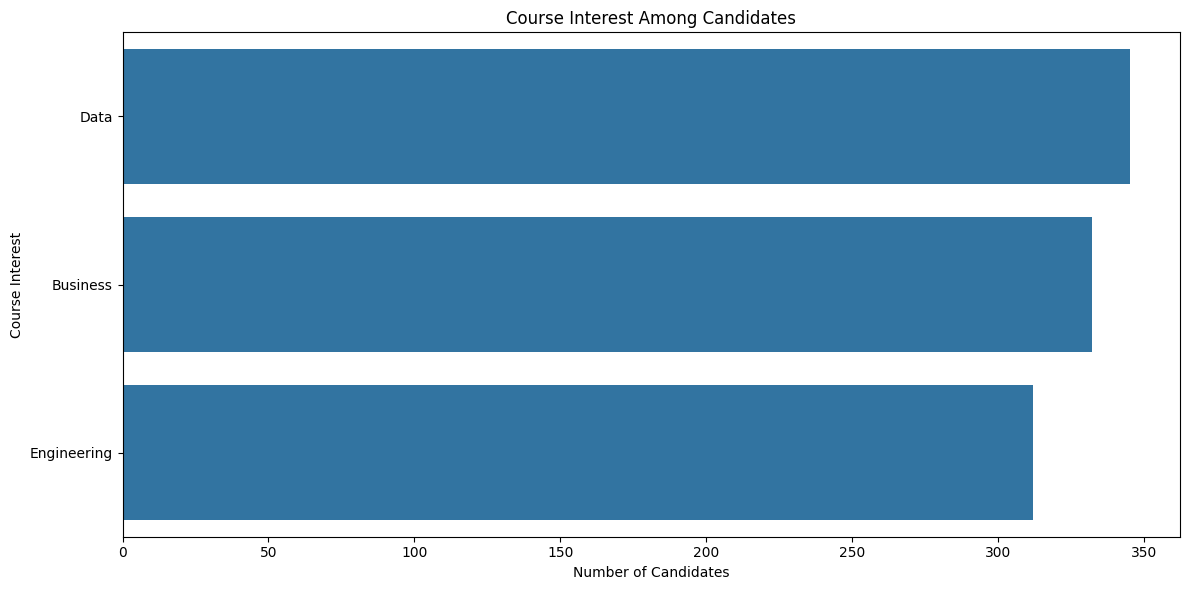

In [22]:
# Clean course interest (optional)
decision_scores['course_interest'] = decision_scores['course_interest'].str.strip().str.title()

# Count course interest values
course_interest_counts = decision_scores['course_interest'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=course_interest_counts.values, y=course_interest_counts.index)
plt.title('Course Interest Among Candidates')
plt.xlabel('Number of Candidates')
plt.ylabel('Course Interest')
plt.tight_layout()
plt.show()

## Gender Distribution of Applicants

This chart shows the gender distribution of all applicants invited to Sparta Day.

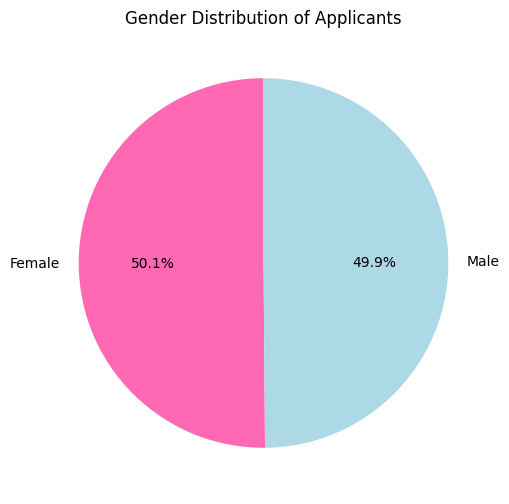

In [37]:
# Clean gender column (optional)
applicants['gender'] = applicants['gender'].str.strip().str.title()

# Count genders
gender_counts = applicants['gender'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['hotpink', 'lightblue', 'lightgrey'])
plt.title('Gender Distribution of Applicants')
plt.ylabel('')
plt.show()

## Comparison of Psychometric and Presentation Scores

This visualisation compares the distribution of psychometric and presentation scores from Sparta Day assessments. 
Displaying the histograms vertically improves readability and makes it easier to compare spread and patterns.

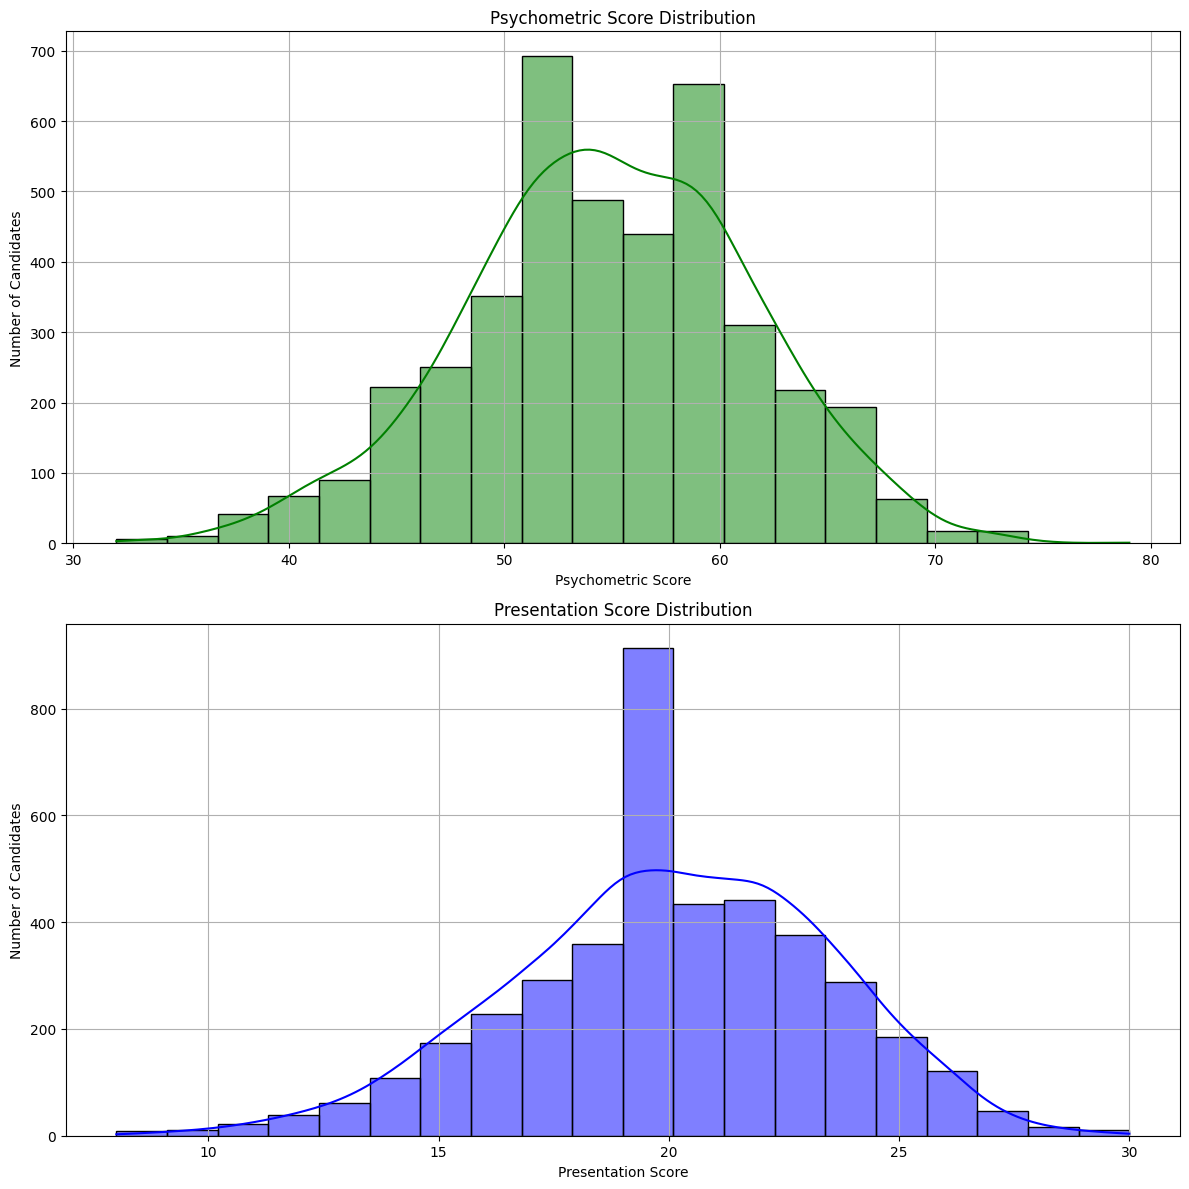

In [40]:
# Drop nulls and convert to numeric (if not already done)
sparta_day_clean = sparta_day.dropna(subset=['psychometrics', 'presentation'])
sparta_day_clean['psychometrics'] = pd.to_numeric(sparta_day_clean['psychometrics'], errors='coerce')
sparta_day_clean['presentation'] = pd.to_numeric(sparta_day_clean['presentation'], errors='coerce')

# Create vertical histograms
fig, axes = plt.subplots(2, 1, figsize=(12, 12))  # 2 rows, 1 column

# Psychometric histogram
sns.histplot(sparta_day_clean['psychometrics'], bins=20, kde=True, ax=axes[0], color='green')
axes[0].set_title('Psychometric Score Distribution')
axes[0].set_xlabel('Psychometric Score')
axes[0].set_ylabel('Number of Candidates')
axes[0].grid(True)

# Presentation histogram
sns.histplot(sparta_day_clean['presentation'], bins=20, kde=True, ax=axes[1], color='blue')
axes[1].set_title('Presentation Score Distribution')
axes[1].set_xlabel('Presentation Score')
axes[1].set_ylabel('Number of Candidates')
axes[1].grid(True)

plt.tight_layout()
plt.show()